<a href="https://colab.research.google.com/github/youuRee/DeepLearning_Lecture/blob/main/Part2_1_CH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3-1: The Graphs of Odds, Logit and Sigmoid

Text(0.5, 0, 'Probability')

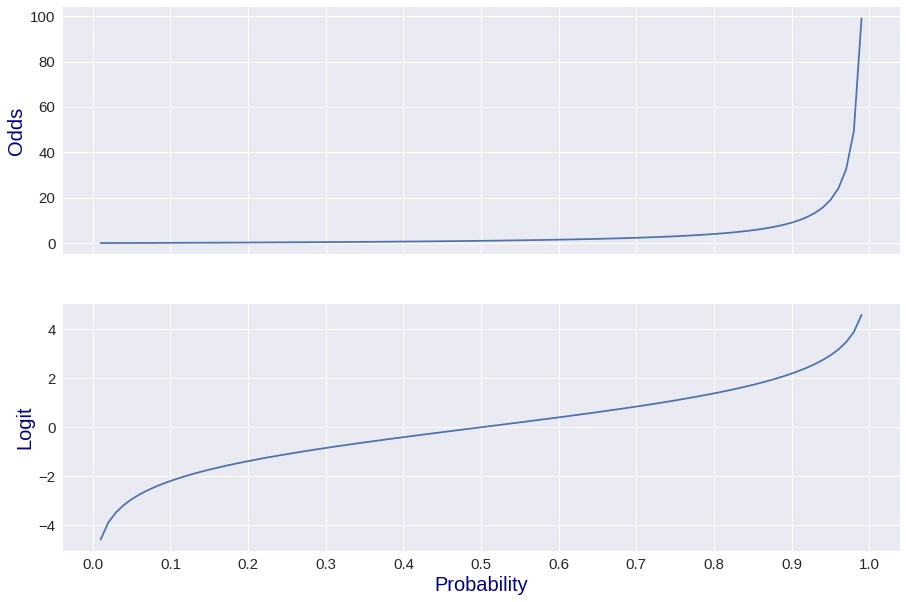

In [15]:
# Code.3-1-1: The Graphs of Odds and Logit

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100) # 확률: 0.01 ~ 0.99
p_tf = tf.linspace(0.01, 0.99, 100)

odds_np = p_np / (1 - p_np)
odds_tf = p_tf / (1 - p_tf)

logit_np = np.log(odds_np)
logit_tf = np.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True) # 행의 수, 열의 수 ,figsize(가로길이,세로길이)

axes[0].plot(p_np, odds_tf)
axes[1].plot(p_np, logit_tf)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')

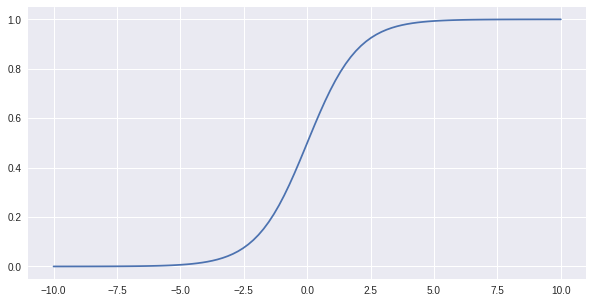

In [16]:
# Code.3-1-2: The Graphs of Sigmoid

import tensorflow as tf
from tensorflow.keras.layers import Activation

X = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(X)

fig, ax = plt.subplots(figsize=(10, 5)) # fig: 하나의 캔버스, ax: 하나의 plot(graph, 선)
ax.plot(X.numpy(), sigmoid.numpy())

3-2: Logistic Regression Models

(100, 1)


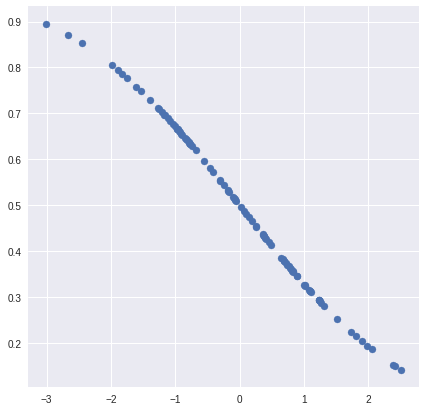

In [19]:
# Code.3-2-1: Single-variate Logistic Regression Models

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 1))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

In [21]:
# Code.3-2-2: Mult-variate Logistic Regression Models

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 5))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)


(100, 1)


3-3: Binary Classifier with Dense Layers

In [2]:
# Code.3-3-1: Binary Classifier with Dense Layers

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

3-4: Softmax Layers

In [8]:
# Code.3-4-1: IO of Softmax

import tensorflow as tf
from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1) # 텐서의 차원의 합

print("Logits: \n", logit.numpy())
print("Probabilities: \n", softmax_value.numpy())
print("Sum of softmax values: \n", softmax_sum)

Logits: 
 [[ 7.3784294   9.301815    1.0941744  -2.844615   -0.30743408]
 [-8.190954    2.8477306   1.7093039   3.3213787   9.88434   ]]
Probabilities: 
 [[1.2744613e-01 8.7225288e-01 2.3774391e-04 4.6292953e-06 5.8532700e-05]
 [1.4089111e-08 8.7684637e-04 2.8087368e-04 1.4080765e-03 9.9743420e-01]]
Sum of softmax values: 
 tf.Tensor([0.99999994 1.        ], shape=(2,), dtype=float32)


In [9]:
# Code.3-4-2: Softmax in Dense Layers

import tensorflow as tf
from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
dense = Dense(units=8, activation='softmax') # units = class 개수

Y = dense(logit)
print(tf.reduce_sum(Y, axis=1))

tf.Tensor(
[0.99999994 0.99999994 1.         1.         1.         0.9999999
 1.         0.9999999 ], shape=(8,), dtype=float32)


3-5: Multi-class Classifiers

In [13]:
# Code.3-5-1: Multi-class Classifiers

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class TestModel(Model):
  def __init__(self):
    super(TestModel, self).__init__()

    self.dense1 = Dense(units=8, activation='relu')
    self.dense2 = Dense(units=5, activation='relu')
    self.dense3 = Dense(units=3, activation='softmax')

  def call(self, x):
    print("X: {}\n{}\n".format(x.shape, x.numpy()))

    x = self.dense1(x)
    print("A1: {}\n{}\n".format(x.shape, x.numpy()))
    
    x = self.dense2(x)
    print("A2: {}\n{}\n".format(x.shape, x.numpy()))

    x = self.dense3(x)
    print("Y: {}\n{}\n".format(x.shape, x.numpy()))
    print("Sum of vectors: {}\n".format(tf.reduce_sum(x, axis=1)))
    return x

model = TestModel()
X = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
Y = model(X)

X: (8, 5)
[[ 0.48356056  4.4743423   7.895872   -4.918089    9.385168  ]
 [ 8.922098   -5.745125    9.097841    0.7364893   3.0833454 ]
 [ 7.524746   -6.9034195  -9.651623    4.7088165   2.977316  ]
 [ 3.7347603   1.5844202   1.832922    2.331131   -4.7277665 ]
 [ 6.726427   -5.611253   -5.232687    7.7597904  -5.89561   ]
 [ 6.6670017  -9.26613     1.9701653   1.1071606   1.8013458 ]
 [-8.918586    0.45670033 -6.702516    9.614611   -5.0801873 ]
 [-1.6938782  -1.3941097  -6.6876554   7.99374     4.8276997 ]]

A1: (8, 8)
[[ 0.          0.         11.120674    0.          3.065509    8.277493
   0.          7.4696345 ]
 [ 5.664629    1.992517    4.51965     0.          2.9727776   3.9809577
   9.367667    9.231883  ]
 [ 1.2623672   6.617208    0.          3.40267     6.4890876   0.
   0.13974115  0.        ]
 [ 0.15798049  0.03582231  0.          0.37132764  0.          0.
   2.2711911   0.25802195]
 [ 2.7972424   6.527957    0.          3.7206059   0.77471644  0.
   4.794355    0.     